# **Forelesning 5 - Bildeklassifisering**
I denne forelesningen skal vi se nærmere på bruk av *bilder* som data, og hvordan vi kan gjøre binær bildeklassifikasjon. Denne notatboken går i hånd med kompendiumet, og fysiske forelesning om tema *Convolutional neural networks*.

## Maskinlæring i samfunnsøkonomi
Dette kurset har som formål å lære dere verktøy fra maskinlæring. Vi har diskutert lineær regresjon, logistisk regresjon, beslutningstrær, random forests, nevrale nettverk og ulike versjoner av sistnevnte.

Maskinlæring har mange bruksområder innen samfunnsøkonomi, særlig fordi den kan analysere store mengder data, finne mønstre og gi oss prediksjoner.  

## 1. Makroøkonomiske prognoser  
- Forutsi BNP-vekst, inflasjon og arbeidsledighet ved å analysere store datasett med økonomiske indikatorer.  
- Sentralbanker kan bruke maskinlæring for å tilpasse sine økonomiske avgjørelser.  

## 2. Arbeidsmarked og lønnsdynamikk  
- Analysere jobbmarkedet og forutsi arbeidsledighet basert på jobbutlysninger, sosiale medier og økonomiske data.  
- Kartlegge hvordan automatisering påvirker sysselsetting i ulike sektorer.  

## 3. Finansiell stabilitet og risikovurdering  
- Oppdage økonomiske bobler ved å analysere finansmarkeder i sanntid.  
- Identifisere systemiske risikoer i banker og finansinstitusjoner.  

## 4. Skatteanalyse og svindeloppdagelse  
- Forutsi skatteinntekter og optimalisere skattesystemet.  
- Bruke algoritmer til å avdekke skattesvindel ved å analysere avvik i regnskapsdata.  

## 5. Modellering av forbrukeratferd  
- Analysere kjøpsmønstre og hvordan økonomiske faktorer påvirker forbruk.  
- Utvikle mer treffsikre modeller for prisdynamikk og etterspørsel.  

## 6. Evaluering av offentlige tiltak  
- Måle effekten av ulike økonomiske politikktiltak (for eksempel subsidier eller velferdsordninger) ved å sammenligne store datasett før og etter implementering.  

## 7. Handels- og investeringsanalyse  
- Forutsi effekten av tollsatser, handelsavtaler og geopolitikk på økonomien.  
- Analysere investeringstrender ved hjelp av alternative data, som satellittbilder og sentimentanalyse fra nyheter.  

Maskinlæring kan altså gi økonomer et bedre verktøy for å forstå komplekse systemer og ta mer informerte beslutninger.  

## Bildeklassifisering i samfunnsøkonomi
Bildeklassifisering med **Convolutional Neural Networks (CNN)** kan brukes i samfunnsøkonomi for å trekke innsikt fra visuelle data.  

## 1. Økonomisk overvåking med satellittbilder  
- **Måling av økonomisk aktivitet**: CNN kan analysere nattlys-satellittbilder for å estimere økonomisk vekst i ulike regioner.  
- **Handelsvolum og forsyningskjeder**: Overvåke aktiviteten i havner og transportknutepunkter for å vurdere internasjonal handel.  
- **Jordbruk og ressursforvaltning**: Predikere matproduksjon og økonomiske effekter av avlingssvikt ved analyse av satellittbilder.  

## 2. Forbruksanalyse og detaljhandel  
- **Kundeatferd i butikker**: Overvåke kundestrømmer i fysiske butikker for å optimalisere produktplassering og bemanning.  
- **Kø- og trafikkmønstre**: CNN kan analysere trafikk- og parkeringsdata for å vurdere økonomisk aktivitet i ulike områder.  

## 3. Arbeidsmarked og automatisering  
- **Yrkesklassifisering via bilder**: CNN kan analysere bilder fra jobbsøkere for å kartlegge yrkesroller basert på arbeidsklær, verktøy og omgivelser.  

## 4. Økonomisk krisehåndtering  
- **Naturkatastrofer og økonomiske tap**: CNN kan evaluere skader fra flom, branner eller jordskjelv for å estimere økonomiske konsekvenser.  
- **Flyktningstrømmer og migrasjon**: Bildeanalyse kan brukes for å overvåke bevegelsesmønstre ved humanitære kriser.  

Ved å kombinere CNN med økonomiske data kan vi få dypere innsikt i hvordan visuelle signaler påvirker økonomiske beslutninger og trender.  
___

# **Eksempel - klassifisering av skip**
I denne notatboken skal vi se hvordan vi kan implementere CNN til å klassifisere om en bilde av et skip er *militært skip* eller *sivilt skip*.

## Installere Dependencies og libraries
Før vi kan begynne koden, trenger vi å installere noe bibliotek.

In [1]:
!pip install tensorflow
!pip install opencv-python # Computer vision modul
!pip install matplotlib
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.11
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
ale-py                             0.10.1
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.6.0
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2025.1.27.0.32.44
astunparse                         1.6.3
atpublic                           4.1.0
attrs                              25.1.0
audioread         

### Tensorflow
Vi importerer TensorFlow for å kunne gjøre koden våre.

In [1]:
import tensorflow as tf
import os

Her kan vi sjekke hvor mange GPU'er vi har tilgjengelig. Dette kan vi endre i Google Colab ved å endre i "Kjøring" --> "Endre kjøringstype".

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Neste linjer med kode er satt for å forhindre minneproblemer når vi kjører store maskinlæringsmodeller.

In [4]:
# Avoid OOM errors (Out of memory) by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Data
Vi skal her se på bilder av militære (0) og sivile (1) båter/skip.
Vi har masse data-eksempler i en mappe, og må *cleane* den for eventuelle dårlige bilder.

### Hvorfor
Et viktig prinsipp i maskinlæring er *shit in, shit out*. Da mener vi at hvis vi har dårlig data, vil modellen vår bli dårlig, noe som vil gi dårlig output av modellen.

In [6]:
# Importerer noen essensielle bibliotek
import cv2                        # For fargekonvertering, og computer-vision
import imghdr                     # Modul som bestemmer hvilke type bilde som er i en fil - brukes for å cleane data.
import matplotlib.pyplot as plt   # For plotting, vise bilder etc.

<ipython-input-6-7ac92bd822d8>:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr                     # Modul som bestemmer hvilke type bilde som er i en fil - brukes for å cleane data.


# Hvordan hente data:
I denne forelesningen vil vi gjennomgå hvordan vi lager en binær-bildeklassifiseringsmodell for å detektere om hva vi ser på bilde er **MILITÆR SKIP** eller **SIVILE SKIP**. Denne koden kan i prinsippet brukes for mange andre binære, bildeklassifiseringsmodeller - men hvor man kanskje må endre visse ting som nettverksarkitekturen.

### Hente bilder fra internett
1. Gå inn på Google Chrome, og last ned en "Utvidelse" ("Extension") som heter "Download All Images".
2. Gå til Google, og skriv inn "army ships".
3. Trykk på "Utvidelser" og trykk "Download All Images".
4. Nå vil alle bildene lastes ned lokalt på PC/Mac'en din.
5. Repeter steg 2 - 4, men ved å søke "Civilian ships".
6. Lag en mappe som heter "data-ships", som inneholder to mapper: "army" og "non-army".
7. Last opp "data-ships" mappen din i "Min disk" ("MyDrive") på Google drive.
8. Nå er du klar for å kjøre koden under.


Tips: Før du laster opp i Google Drive, kan det være lurt å fjerne de minste filene. F.eks. de som er under 10 kB, da de ofte er veldig små og kan by på problemer.

# Last data inn i Google Colab

In [7]:
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your folder
data_dir = '/content/drive/MyDrive/data-ships'
data_dir

Mounted at /content/drive


'/content/drive/MyDrive/data-ships'

## Sjekker hvilke mapper som er inne i vårt *data_dir*

In [8]:
os.listdir(data_dir)

['army', 'non-army']

In [9]:
# Får en liste av sub-directories (foldere) som er en del av vår data_dir
folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]

# Teller files i hver mappe/foldere
file_counts = {folder: len(os.listdir(os.path.join(data_dir, folder))) for folder in folders}

# Print results
for folder, count in file_counts.items():
    print(f"Folder '{folder}' contains {count} files.")

Folder 'army' contains 195 files.
Folder 'non-army' contains 229 files.


## Her kan vi få opp alle filnavnene under mappen 'army'

In [10]:
os.listdir(os.path.join(data_dir, 'army'))

['images (6).jpeg',
 'images (4).jpeg',
 'image (18).jpeg',
 'image (1).jpeg',
 '1156395_1.jpg',
 'images (1).jpeg',
 'image (19).jpeg',
 'image (27).jpeg',
 'image (4).jpeg',
 'image (20).jpeg',
 'image (23).jpeg',
 '1400x-1.jpg',
 '6046754-1.jpg',
 'image (1).png',
 'lcs-2.jpg',
 'image (8).jpeg',
 'photo 2_0.jpg',
 'image (3).jpeg',
 'sddefault.jpg',
 '82496.jpg',
 'image (21).jpeg',
 'image (25).jpeg',
 '2003-034-04.jpg',
 'hms_QE.jpg',
 'images.jpeg',
 'images (3).jpeg',
 '5014404.jpg',
 'image (6).jpeg',
 'images (2).jpeg',
 'image (38).jpeg',
 'image (5).jpeg',
 'image (39).jpeg',
 'image (26).jpeg',
 'USS Bataan.jpg',
 'Social_5.jpg',
 'hq720.jpg',
 'HMS-London.jpg',
 'image (7).jpeg',
 'image (9).jpeg',
 'image (24).jpeg',
 'image.jpeg',
 'Kiev-class-Carrier-alternative-780x476.jpg',
 '1485545231724.jpg',
 'battle-cape-st-vincent.jpg',
 '7--140-Defiant.jpg',
 'Page-Activités-C35-3-min-1920x840.png',
 'maxresdefault.jpg',
 'im-55027265.jpeg',
 'My-project-1.jpeg',
 '5a309606b0

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
img = cv2.imread(os.path.join(data_dir, 'army', '1647297548254.jpg'))

In [13]:
img_2 = cv2.imread(os.path.join(data_dir, 'army',  'HMS Queen Elizabeth -MoD-.jpg'))

In [14]:
print(img.shape)
print(img_2.shape)

(720, 1280, 3)
(738, 1200, 3)


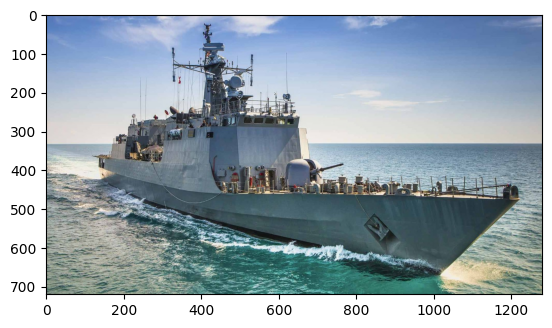

In [15]:
# OPENCV leser bilder som BGR, matplotlib forventer RGB
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Konverterer BGR til RGB
plt.show()

In [16]:
### Funksjon for å fjerne potensielle kjipe filer, som vi ikke trenger ###

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

## Laste inn data'en
Sjekk ut `tf.data.Dataset`, som vi kommer til å bruke mye her. Tensorflow dokumentasjon, til dem som skal gjøre bildeklassifisering i prosjektet finnes [her](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)!

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
# Dette her er gull - tf.keras.utils.image_dataset_from_directory er fantastisk for bildeklassifisering
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 424 files belonging to 2 classes.


In [19]:
# Kjøre denne kodeblokken for å se hva vi kan konfigurere!
tf.keras.utils.image_dataset_from_directory??

In [20]:
# Shuffle (stokking av dataene)
data_iterator = data.as_numpy_iterator()

In [21]:
# Får en ny batch fra vår "iterator" - "vi henter en batch"
batch = data_iterator.next()

# Denne batch'en består av bilder (i numpy format), og labels/merkinger (0 or 1, army/not-army)

In [22]:
len(batch)

2

In [23]:
# Se på shape til ett bilde
batch[0].shape

(32, 256, 256, 3)

In [24]:
# Aksessere bildene (images)
batch[0]

# Aksessere labels
batch[1]

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int32)

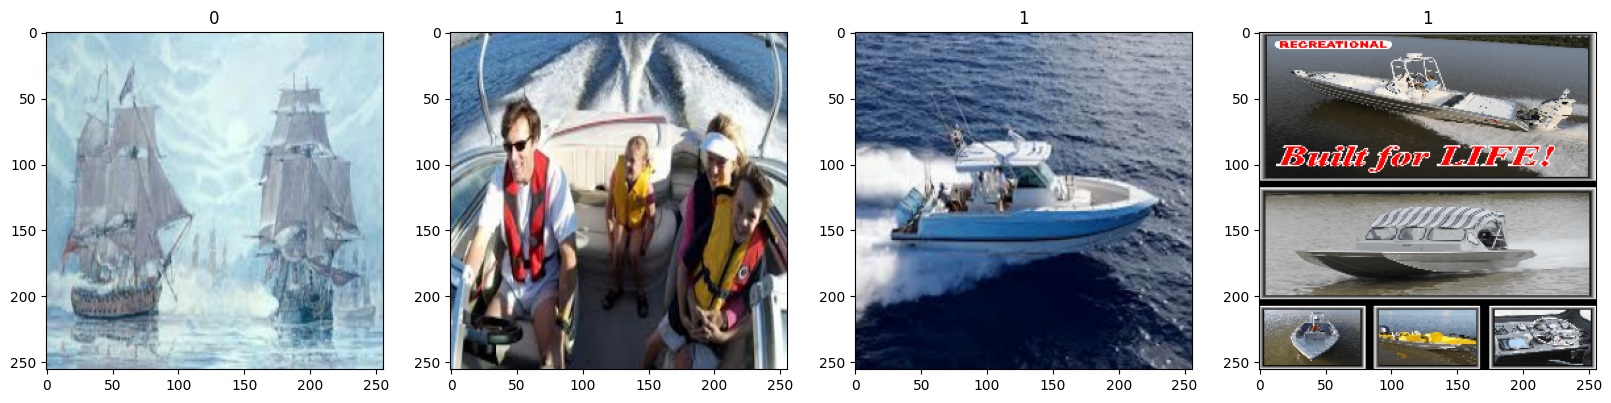

In [25]:
# 0 = Army (militære) boats
# 1 = Civilian (sivile) boats

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    #ax[idx].imshow(img)
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Klassifisering
Vi har tidligere snakket om forskjellen mellom *regresjon* og *klassifikasjon*, her gjør vi altså sistnevnte.

Som vi kan se over, så representerer '0' militære skip og '1' ikke-militære. Det som er fint med koden vi presenterer her er at dette kan i prinsippet trenes for all mulig slags use-case'r med binær bildeklassifisering.

In [26]:
# Selve bildene er hvor, key = 0
batch[0]

array([[[[161.85156 , 199.85156 , 212.85156 ],
         [159.55469 , 197.55469 , 210.55469 ],
         [157.25781 , 195.25781 , 208.25781 ],
         ...,
         [194.6289  , 227.6289  , 234.6289  ],
         [195.77734 , 228.77734 , 235.77734 ],
         [196.92578 , 229.92578 , 236.92578 ]],

        [[161.85156 , 199.85156 , 212.85156 ],
         [159.55469 , 197.55469 , 210.55469 ],
         [157.25781 , 195.25781 , 208.25781 ],
         ...,
         [193.61328 , 226.61328 , 233.61328 ],
         [194.76172 , 227.76172 , 234.76172 ],
         [195.91016 , 228.91016 , 235.91016 ]],

        [[162.03125 , 199.67188 , 212.85156 ],
         [159.73438 , 197.375   , 210.55469 ],
         [157.4375  , 195.07812 , 208.25781 ],
         ...,
         [192.15652 , 225.15652 , 232.15652 ],
         [193.23828 , 226.23828 , 233.23828 ],
         [194.38672 , 227.38672 , 234.38672 ]],

        ...,

        [[102.633484, 149.81317 , 170.17255 ],
         [ 96.18561 , 143.3653  , 163.72467 ]

In [27]:
# Labels er i key = 1 (altså, om bildene av skipene er sivile eller militære)
batch[1]

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int32)

In [31]:
# Siden batch[0] er bildene våre, vil batch[0].shape gi (#number of images, 256, 256, 3) ---> 3 kanaler=fargebilde.
# Så hvis vi ser på batch[0].min() og batch[0].max() - vil de returnere henholdsvis 0.0 and 255.0
batch[0].shape

(32, 256, 256, 3)

In [28]:
batch[0].min()

0.0

In [29]:
batch[0].max()

255.0

Husk når vi diskuterte *rank-3 tensorer*, da det er tre matriser *stakket* over hverandre. Derfor snakker vi ofte om RGB, da det er et *lag*/matrise per farge.

![Bilde](https://miro.medium.com/v2/resize:fit:1400/1*8pX8Zt2PvIswXv3JY5_AWg.png)


### Når vi bruker dyp-læringsmodeller, bør verdiene vi jobber med (ideelt sett) være så små som mulig!
Dette gjøres for de da går *optimaliseringen* MYE fortere. Da kan vi normalisere, det gjør vi ved å dele alle bilde-verdiene på $255$, kall disse $x_i$, og da vil vi få normaliserte verdier - $x_i* \in[0, 1]$.

Dette kalles i *rescaling* eller *min-max normalisering* og kan uttrykkes matematisk:
$$x_{i*}=\frac{x_i-min(\mathbf{x})}{max(\mathbf{x})-min(\mathbf{x})}$$

I dette tilfellet er $min(\mathbf{x})=0$ og $max(\mathbf{x})=255$.


Uansett, det viktige her er at da vil optimalisering gjennom 'ADAM' eller 'Stochastic Gradient Decent' (som diskutert i forelesning 2), vil gå betydelig fortere.

In [30]:
# Her skalerer vi dataen vår til å være mellom 0 og 1.
# data.map funker bra for transformasjon av data.
# lambda funksjonen lar oss skalerer bildet, altså x - og lar y være som den er.
data = data.map(lambda x,y: (x/255, y))

I koden over vil skalere bildene $x$ med å dele på $255$, slik at hver piksel består av en verdi mellom $0$ og $255$. Men $y$ forblir den samme, som er $0$ eller $1$, basert på om bilde er sivilt eller et militært skip.

In [31]:
# Her ser vi at dataene er normalisert, altså mellom 0 og 1.
data.as_numpy_iterator().next()

(array([[[[0.38692817, 0.461438  , 0.52810466],
          [0.40009025, 0.45107064, 0.5255804 ],
          [0.41473067, 0.4735542 , 0.548064  ],
          ...,
          [0.40742797, 0.4388005 , 0.52115345],
          [0.374702  , 0.41783926, 0.49627063],
          [0.3947682 , 0.42430252, 0.4938491 ]],
 
         [[0.4358869 , 0.50272226, 0.57322615],
          [0.37538487, 0.43420842, 0.5087182 ],
          [0.40396392, 0.46636435, 0.5294541 ],
          ...,
          [0.3826629 , 0.42545548, 0.50400174],
          [0.3724984 , 0.39625758, 0.4824172 ],
          [0.4080108 , 0.43061343, 0.5166348 ]],
 
         [[0.38828543, 0.4549521 , 0.52554035],
          [0.40803164, 0.46685517, 0.54136497],
          [0.41508585, 0.46606624, 0.5327329 ],
          ...,
          [0.38450366, 0.4158762 , 0.49822915],
          [0.39097363, 0.41450304, 0.50077754],
          [0.40754992, 0.42819944, 0.514474  ]],
 
         ...,
 
         [[0.09294637, 0.17519483, 0.2657295 ],
          [0.05672

## Splite data inn i trening, validering og test sett.

In [32]:
len(data)

14

In [33]:
### Dette splitter data inn i trening, validering og test. ###

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [34]:
# Så her får vi opp hvor mange batcher vi har i treningsdataene, hvor batch_size ble satt lenger oppe
train_size

9

In [35]:
# Så her får vi opp hvor mange batcher vi har i valideringsdataene, hvor batch_size ble satt lenger oppe
val_size

2

In [36]:
test_size

1

In [37]:
### Her bruker jeg train og skip metoder fra tensorflow for å sortere data. Her er det viktig at dataene allered er shuffled. ###

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Nå kan vi bygge vår bilde-klassifiseringsmodell!

In [38]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [40]:
# Vi lager en sekvensiell modell, og legger på lag ved hjelp av 'model.add'-metoden.
model = Sequential()

In [41]:
### Så her bygger vi vår faktiske modell ###

# There are the Convolutional blocks, one flatten layer and two dense layers.

# This adds a 2D Convolutional layers - sequantially. The input is a color-image.
# 16 filters, 3x3 pixels in size, and a stride of 1 pixel. This is ML architecture.
# ReLu activation function, outputs will be passed through a ReLu function! Will
# capture non-linear patterns in our data, which is great and a huge application of ML:-)
# image shape is 256x256 images, and three layers/channels deep (because its color images).
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# 32 filter.
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# 16 filters
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Here we flatten the data
model.add(Flatten()) #gjøre til vektor

# Now we have the flatten layer connected to 256 neurons.
model.add(Dense(512, activation='relu')) #skjult lag

# Single dense layer, and use sigmoid activation function to return 0 or 1 - using 0.5 as a threshold.
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Her bruker vi opitimzer='adam', men den kan endres på!
# Loss er 'binary cross entropy', og vi får tilbake accuracy (fra en conf. matrix).
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
# Here we get the summary of our NN is doing!
# So max_pooling2D dont add any parameters, as you can see.
# 30x30x16 = 14400 - when we flatten our data.
# 257 in the end, is 256 + the bias term.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       7,373,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,383,537 (28.17 MB)

 Trainable params: 7,383,537 (28.17 MB)

 Non-trainable params: 0 (0.00 B)

## Nå kan vi begynne å *trene*

In [44]:
logdir='logs'

In [45]:
# Nice to save our model, and log our training.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [46]:
# Se på training data
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [47]:
# model.fit is for training our model. Epoch, one epoch is one run over our entire
# training data. And we also going to iterate through our validation data.
# and we load our callbacks, to look at our training process later.
hist = model.fit(train, epochs=20, batch_size=1, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 797ms/step - accuracy: 0.4689 - loss: 1.3713 - val_accuracy: 0.5156 - val_loss: 0.6892
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 718ms/step - accuracy: 0.6115 - loss: 0.6641 - val_accuracy: 0.7344 - val_loss: 0.6182
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7049 - loss: 0.6239 - val_accuracy: 0.8125 - val_loss: 0.4796
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 749ms/step - accuracy: 0.7371 - loss: 0.5584 - val_accuracy: 0.7500 - val_loss: 0.4695
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 915ms/step - accuracy: 0.8048 - loss: 0.4647 - val_accuracy: 0.7969 - val_loss: 0.4437
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 978ms/step - accuracy: 0.8232 - loss: 0.4232 - val_accuracy: 0.8125 - val_loss: 0.4286
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 694ms/step - accuracy: 0.8755 - loss: 0.3097 - val_accuracy: 0.9375 - val_loss: 0.2718
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 816ms/step - accuracy: 0.9131 - loss: 0.2657 - val_accuracy: 0.9375 - val_loss: 

## Vi plotter hvordan treningen går

In [48]:
# Se på vår performance for training og validation.
hist.history

{'accuracy': [0.4826388955116272,
  0.6180555820465088,
  0.7048611044883728,
  0.7430555820465088,
  0.7777777910232544,
  0.8263888955116272,
  0.8611111044883728,
  0.90625,
  0.9479166865348816,
  0.9097222089767456,
  0.9305555820465088,
  0.96875,
  0.9722222089767456,
  0.9826388955116272,
  0.9930555820465088,
  1.0,
  0.9965277910232544,
  1.0,
  1.0,
  1.0],
 'loss': [1.1716469526290894,
  0.6554944515228271,
  0.6083533763885498,
  0.5449330806732178,
  0.47023725509643555,
  0.41712552309036255,
  0.32270321249961853,
  0.26234346628189087,
  0.1956952065229416,
  0.1857001930475235,
  0.18423351645469666,
  0.1159219741821289,
  0.08976075798273087,
  0.05571530759334564,
  0.04523295536637306,
  0.02385113574564457,
  0.018909594044089317,
  0.020589129999279976,
  0.008518035523593426,
  0.009527095593512058],
 'val_accuracy': [0.515625,
  0.734375,
  0.8125,
  0.75,
  0.796875,
  0.8125,
  0.9375,
  0.9375,
  0.90625,
  0.9375,
  0.90625,
  0.984375,
  0.984375,
  0.984

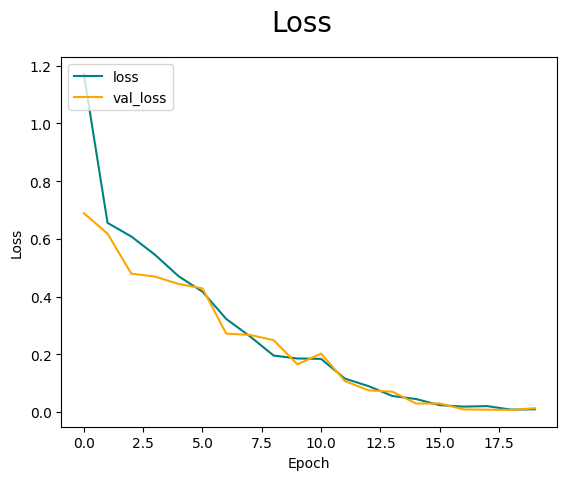

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

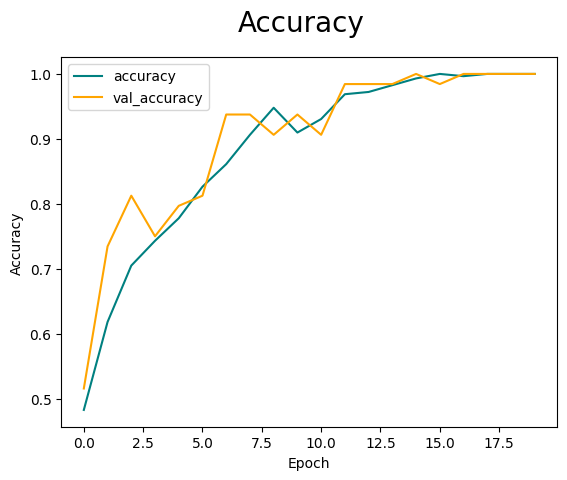

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

## Nå kan vi evalurer modellen vår
Dette gjør vi altså ved å teste modellen på det **u-sette** test settet!

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


In [54]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


## La oss ta en tilfeldig test av et nytt bilde

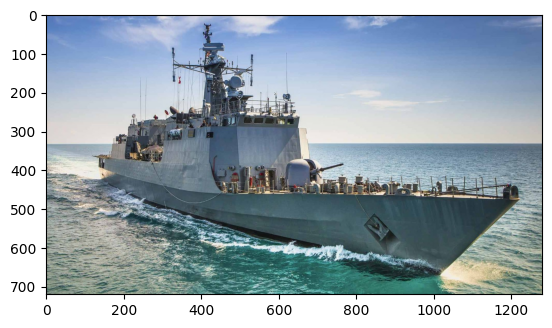

In [55]:
import cv2

img = cv2.imread(os.path.join(data_dir, 'army', '1647297548254.jpg'))
#plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB
plt.show()

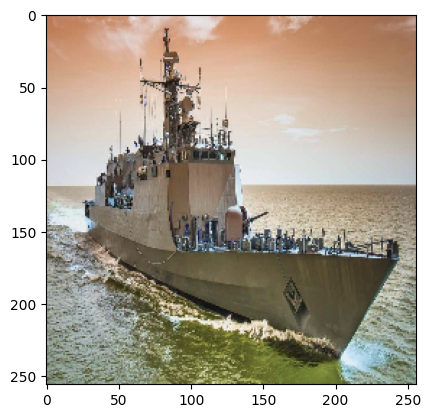

In [56]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
# Here we normalize the data by dividing the 'resize' image by 255, to be in the scale [0, 1] --> because then ML stuff goes easier and faster.
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


In [58]:
yhat

array([[6.980744e-05]], dtype=float32)

In [59]:
if yhat > 0.5:
    print(f'Predicted class is non-Army')
else:
    print(f'Predicted class is Army')

Predicted class is Army


## Eksempelet fra sist gang - MNIST

[Se på denne!](https://adamharley.com/nn_vis/cnn/2d.html)

# **Kode eksempel - Convolutional Neural Networks**
Her er et kode-eksempel som bruker et spesielt type nettverk, CNN, dette vil vi ser mer på i forelesning 5.

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [61]:
# Laster inn MNIST-datasettet (håndskrevne siffer).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normaliserer bildene til verdier i området [0, 1] ved å dele på 255.
# Dette gjør at pikselverdiene, som opprinnelig er i området [0, 255], skaleres til flyttall mellom 0 og 1.
x_train = x_train / 255
x_test = x_test / 255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [62]:
# Laster inn MNIST-datasettet (håndskrevne siffer).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normaliserer bildene til verdier i området [0, 1] ved å dele på 255.
# Dette gjør at pikselverdiene, som opprinnelig er i området [0, 255], skaleres til flyttall mellom 0 og 1.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Endrer formen på bildene fra (num_samples, 28, 28) til (num_samples, 28, 28, 1).
# Den ekstra dimensjonen (1) representerer antall kanaler (her gråskala), hadde den vært satt til (3) har vi fargebilder
# da de har tre fargekanaler RGB (Rød, Grønn, Blå).
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

#Obs: Den første "-1" i reshape() lar NumPy automatisk beregne antall eksempler (num_samples).


# One-hot encoder etikettene (klassene) slik at hver etikett blir representert som en vektor med 10 elementer.
# Eksempel: Hvis en etikett er 3, blir den representert som [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Når du setter den første dimensjonen til `-1`, vil `reshape()`-funksjonen fra NumPy automatisk finne ut hvor mange bilder det er, basert på størrelsen på resten av dimensjonene $(28, 28, 1)$. På denne måten slipper du å manuelt spesifisere antall bilder `num_samples()` (Men, her vet vi at det er 60.000 bilder i treningsdataene - fra MNIST).

In [63]:
# Importere nødvendige biblioteker fra TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# Lager en sekvensiell modell
model = Sequential([
    # Første konvolusjonslag
    # Bruker 32 filtre av størrelse (3, 3), aktivert med ReLU, og forventer en inputform av (28, 28, 1) - altså våre gråskalabilder.
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Maksimal pooling-lag som reduserer dimensjonaliteten til funksjonskartene.
    # Bruker en pooling størrelse på (2, 2), noe som halverer både bredde og høyde.
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Dropout-lag for å forhindre overfitting ved tilfeldig å sette 25% av nevronene til null under trening.
    Dropout(0.25),

    # Andre konvolusjonslag med 64 filtre, fortsatt med ReLU-aktivering.
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Ny maksimal pooling-lag for ytterligere dimensjonsreduksjon.
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Ytterligere dropout-lag for å forhindre overfitting, denne gangen med 25%.
    Dropout(0.25),

    # Flatten-lag som konverterer de 2D-funksjonskartene til 1D-vektorer.
    tf.keras.layers.Flatten(),

    # Første Dense-lag med 128 nevroner og ReLU-aktivering, som fullstendig kobler til forrige lag.
    Dense(128, activation='relu'),

    # Dropout-lag for å hindre overfitting i dette laget også, nå med 50%.
    Dropout(0.5),

    # Utgangslag med 10 nevroner som representerer de 10 klassene, aktivert med softmax for å få sannsynligheter.
    Dense(10, activation='softmax')
])

# Modellstrukturen er nå definert. Den kan kompileres og trenes på datasett etterpå.

In [64]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8355 - loss: 0.5086
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9672 - loss: 0.1070
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9754 - loss: 0.0830
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9788 - loss: 0.0693
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9811 - loss: 0.0638
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9828 - loss: 0.0574
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9851 - loss: 0.0487
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9865 - loss: 0.0444
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9866 - loss: 0.0435
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9876 - loss: 0.0413


In [66]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}: Test loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9914 - loss: 0.0304
Test accuracy: 0.9933000206947327: Test loss: 0.022702490910887718


## Her ser vi at vi har fått en test accuracy på over $99$%!
Her har vi brukt en annen form for nevrale nettverk, kalt *Convolutional Neural Networks* - som vi vil se mer på i forelesning 5!